<a href="https://colab.research.google.com/github/eklee0421/Data_Mining/blob/master/mnist_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
tf.__version__

'2.2.0-rc3'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print("train_images : ", train_images.shape)
print("train_labels : ", train_labels.shape)
print("test_images : ", test_images.shape)
print("test_labels : ", test_labels.shape)

train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


그림속 숫자 :  9


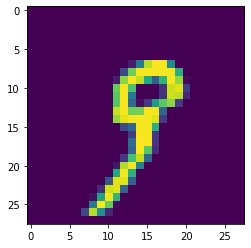

In [5]:
from matplotlib import pyplot as plt
plt.imshow(train_images[19])
print("그림속 숫자 : ",train_labels[19])

In [0]:
#DNN을 이용해서 모든 layer끼리 연결해주어야 한다 => 28*28 
#mnist를 DNN으로 구현하면 다음과 같다
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
model = models.Sequential()
model.add(layers.Dense(units= 1024, input_dim = 784, activation='relu'))
model.add(layers.Dense(units= 512, activation='relu'))
model.add(layers.Dense(units= 256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 1,462,538
Trainable params: 1,462,538
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_images, train_labels, epochs=5, batch_size=512)

Epoch 1/5
118/118 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.9140
Epoch 2/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0909 - accuracy: 0.9721
Epoch 3/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9821
Epoch 4/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9883
Epoch 5/5
118/118 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9920


In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0642 - accuracy: 0.9814
0.9814000129699707
